## Monte Carlo Simulation and Variance

**Monte Carlo Simulation**
- A method of estimating the value of an unknown quantity using the principles of inferential statistics

Inferential Statistics
- Population: a set of examples
- Sample: a subset of a population
- - Key fact: a random sample tends to exhibit the same properties as a population provided it is sufficiently large and random

--> When should we believe that a sample has the same properties as the population


***Confidence**
- Size of sample (100 versus 2)
- Variance of sample (all heads versus 52/100 heads)


As variance grows, we need larger samples to have the same degree of confidence

Want to explore trade off between # of samples and confidence in estimate
- We are going to use roulette, as we know what actual estimates should be

- Gives us a way to explore how confidence in an estimate of some parameter changes as the number of samples changes



In [1]:
import random
class Fair_roulette():

    def __init__(self):
        self.pockets = list(range(1, 37))
        self.ball = None
        self.pocket_odds = len(self.pockets) - 1

    def spin(self):
        self.ball = random.choice(self.pockets)

    def bet_pocket(self, pocket, amt):
        if str(pocket) == str(self.ball):
            return amt * self.pocket_odds
        else:
            return -amt

    def __str__(self):
        return "Fair roulette"


def play_roulette(game, num_spins, pocket, bet):
    tot_pocket = 0
    for _ in range(num_spins):
        game.spin()
        tot_pocket += game.bet_pocket(pocket, bet)

    winnings = tot_pocket / num_spins

    print(f"{num_spins:,} spins of {game}")
    print(f"Return on betting {pocket} = {100*winnings:.4g}%")
    print()
    return winnings

for i in range(3):
    play_roulette(Fair_roulette(), 100, 2, 2)


for i in range(3):
    play_roulette(Fair_roulette(), 1_000_000, 2, 2)

100 spins of Fair roulette
Return on betting 2 = 88%

100 spins of Fair roulette
Return on betting 2 = 16%

100 spins of Fair roulette
Return on betting 2 = -128%

1,000,000 spins of Fair roulette
Return on betting 2 = -0.0128%

1,000,000 spins of Fair roulette
Return on betting 2 = -0.3296%

1,000,000 spins of Fair roulette
Return on betting 2 = 0.6568%



Variance between trials is reduced with a larger number of spins

***Law of Large Numbers***
- The average of a set of samples drawn with the same given probability `p` from a population converges to the expected value of the population when the number of samples goes to infinity

Gambler's Fallacy
- In independent trials, past results have no effect on future trials


Regression to the Mean
- Extreme characteristics are not passed on completely to their offspring
- "The average regression of the offspring is a constant fraxction of their respective mid-parental deviations

This is a phenomenon, not a law

**Following an extreme random event, the next random event is likely to be less extreme**

If you spin a fair roulette wheel 10 times and get 100% reds, that is an extreme event (1/1024)

It is likely that in the next 10 spins, it is likely that you will get fewer than 10 reds
- Expected number of 5

So if you look at the average of the 20 spins, it will be closer to the expected mean of 50% reds than to the 100% of the first 10 spins



In [ ]:
class Student(object):
    def __init__(self, name, ability):
        self.name = f'Ability {ability:.2f}'
        self.ability = ability
        self.randomness = 1 - ability
        self.grades = []
    def take_quiz(self):
        score = 100 * (self.ability + random.random() * (1 - self.ability))
        self.grades.append(int(score))
    def get_grades(self):
        return self.grades[:]
    def get_ability(self):
        return self.ability
    def get_mean(self):
        return sum(self.grades)/len(self.grades)
    def __str__(self):
        return f'{self.name}: {self.grades}: mean = {self.get_mean():.2f}'

random.seed(0)

# Create list of students
num_students = 10
students = []
for i in range(num_students):
    students.append(Student(f'Student {i}', random.random()))

for s in students:
    for _ in range(7):
        s.take_quiz()

students.sort(key=lambda x: x.get_ability(), reverse = True)
for s in students:
    print(s)

Ability 0.84: [98, 92, 88, 96, 94, 88, 98]: mean = 93.43
Ability 0.78: [80, 85, 89, 98, 80, 90, 93]: mean = 87.86
Ability 0.76: [99, 95, 97, 83, 93, 97, 92]: mean = 93.71
Ability 0.58: [85, 78, 62, 89, 94, 96, 93]: mean = 85.29
Ability 0.51: [91, 83, 51, 75, 93, 63, 67]: mean = 74.71
Ability 0.48: [78, 67, 77, 62, 57, 57, 79]: mean = 68.14
Ability 0.42: [69, 47, 67, 77, 94, 98, 69]: mean = 74.43
Ability 0.40: [92, 51, 74, 54, 98, 88, 67]: mean = 74.86
Ability 0.30: [68, 87, 67, 97, 72, 71, 61]: mean = 74.71
Ability 0.26: [90, 45, 85, 66, 26, 79, 55]: mean = 63.71


Correlation between ability and mean, but luck matters


In [ ]:
class Eu_roulette(Fair_roulette):
    def __init__(self):
        super().__init__()
        self.pockets.append(0)

    def __str__(self):
        return "European roulette"

class Am_roulette(Eu_roulette):
    def __init__(self):
        super().__init__()
        self.pockets.append(0)

    def __str__(self):
        return "American roulette"

In [4]:
import numpy as np
def sim_games_CI(spin_list):
    num_trials = 20
    games = (Fair_roulette, Eu_roulette, Am_roulette)
    for num_spins in spin_list:
        print(f"Simulate {num_trials:,} trials of {num_spins:,} spins each")
        for g in games:
            game = g()
            pocket_returns = [play_roulette(game, num_spins, pocket=2, bet=1)
                              for _ in range(num_trials)]
            estimated_return = pocket_returns[0]
            print(f"Estimated return for {game} = {100*estimated_return:.3f}%")
            std_dev = np.std(pocket_returns)
            print(f"    +/-{100*1.96*std_dev:.3f}% with 95% confidence")
        print()

Simulate 20 trials of 1,000 spins each
1,000 spins of Fair roulette
Return on betting 2 = -17.2%

1,000 spins of Fair roulette
Return on betting 2 = 29.6%

1,000 spins of Fair roulette
Return on betting 2 = -6.4%

1,000 spins of Fair roulette
Return on betting 2 = -6.4%

1,000 spins of Fair roulette
Return on betting 2 = 18.8%

1,000 spins of Fair roulette
Return on betting 2 = 11.6%

1,000 spins of Fair roulette
Return on betting 2 = -20.8%

1,000 spins of Fair roulette
Return on betting 2 = 4.4%

1,000 spins of Fair roulette
Return on betting 2 = 15.2%

1,000 spins of Fair roulette
Return on betting 2 = 11.6%

1,000 spins of Fair roulette
Return on betting 2 = 18.8%

1,000 spins of Fair roulette
Return on betting 2 = 15.2%

1,000 spins of Fair roulette
Return on betting 2 = -17.2%

1,000 spins of Fair roulette
Return on betting 2 = 69.2%

1,000 spins of Fair roulette
Return on betting 2 = -20.8%

1,000 spins of Fair roulette
Return on betting 2 = 11.6%

1,000 spins of Fair roulette
R

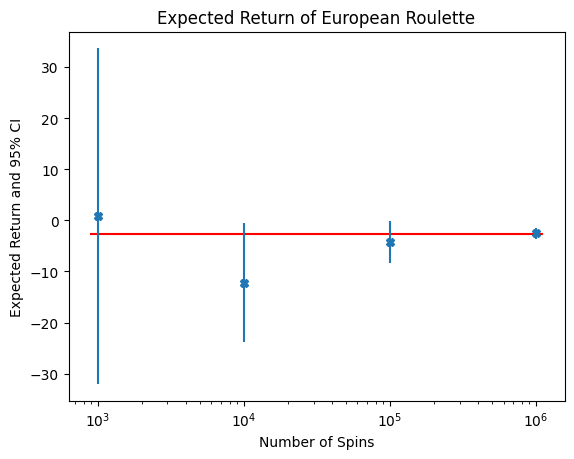

In [5]:
random.seed(0)
import matplotlib.pyplot as plt
sim_games_CI([10**p for p in range(3, 7)])

plt.plot([10**3 * 0.9, 10**6 * 1.1], np.ones(2) * -2.703, color='r')
plt.errorbar([10**p for p in range(3, 7)],
             (0.800, -12.160, -4.312, -2.555),
             (32.890, 11.559, 4.111, 0.989),
             linestyle='none', marker='X')
plt.semilogx()
plt.xlabel("Number of Spins")
plt.ylabel("Expected Return and 95% CI")
plt.title("Expected Return of European Roulette")
plt.show()

Eventually the casino always wins
As the number of spins grows, the expected return seems to converge to match table
Ideally we should be able to quantify that effect

1. Never possible to gurantee perfect accuracy
2. Not to say that an estimate is not precisely correct
3. Key Question:
- How many samples do we need to look at before we can have justified confidence?

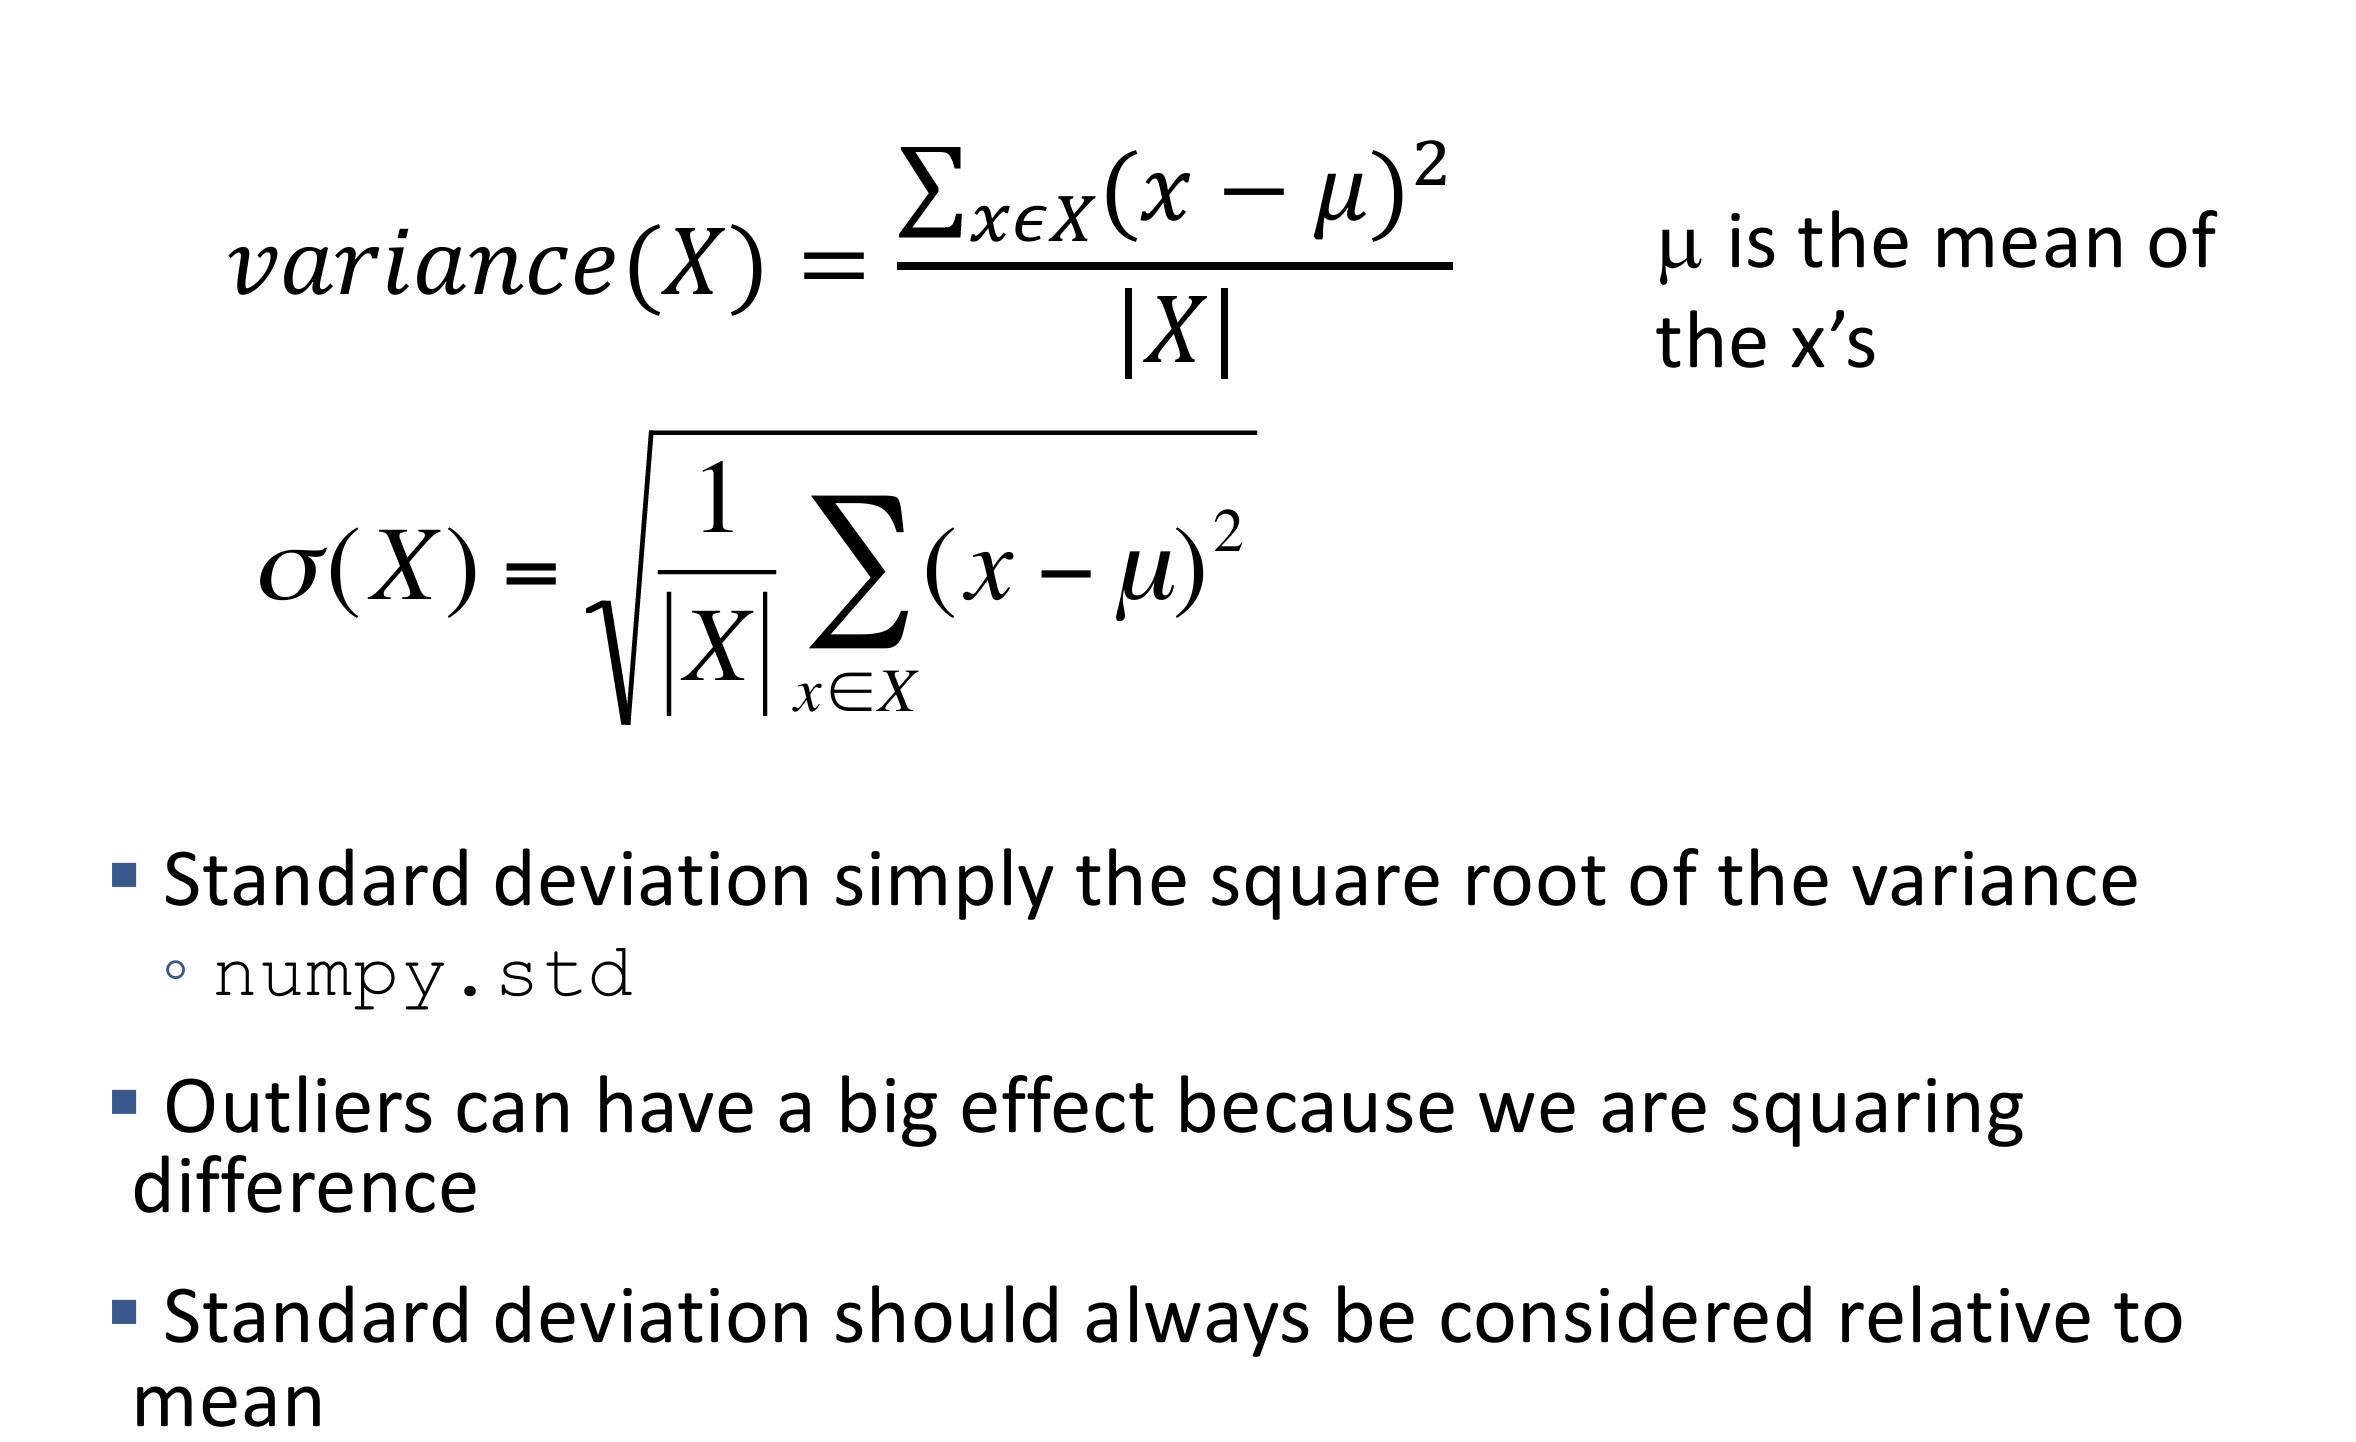

Instead of estimating an unknown parameter by a single value, a confidence interval provides a range that is likely to contain the unknown value and a confidence that the unknown value lays within that range

"The estimated return on betting a pocket 10k times in European roulette is -2.7%. The margin of error is +/-1% with a 95% level of confidence"

What does this mean?
- If I were to repeat the experiment of 10k bets an infinite number of times, in 95% of those experiments, the generated
confidence interval would include the unknown return
- So, for this experiment, we have 95% confidence in estimating that the return lies between -3.7% and -1.7%

Empirical Rule:
- Where do we get the range of the confidence interval?
- Under some assumptions discussed later
- - 95% of data lies within 1.96 standard deviations from the mean


Assumptions underlying empirical rule
- The mean estimation error is zero
- The distribution of the errors in the estimates is normal


**Exploiting Randomness**
1. Using randomized computation to model stochastic situations
2. Using randomized computation to solve problems that are not inherently random
3. e.g. what's the value of pi

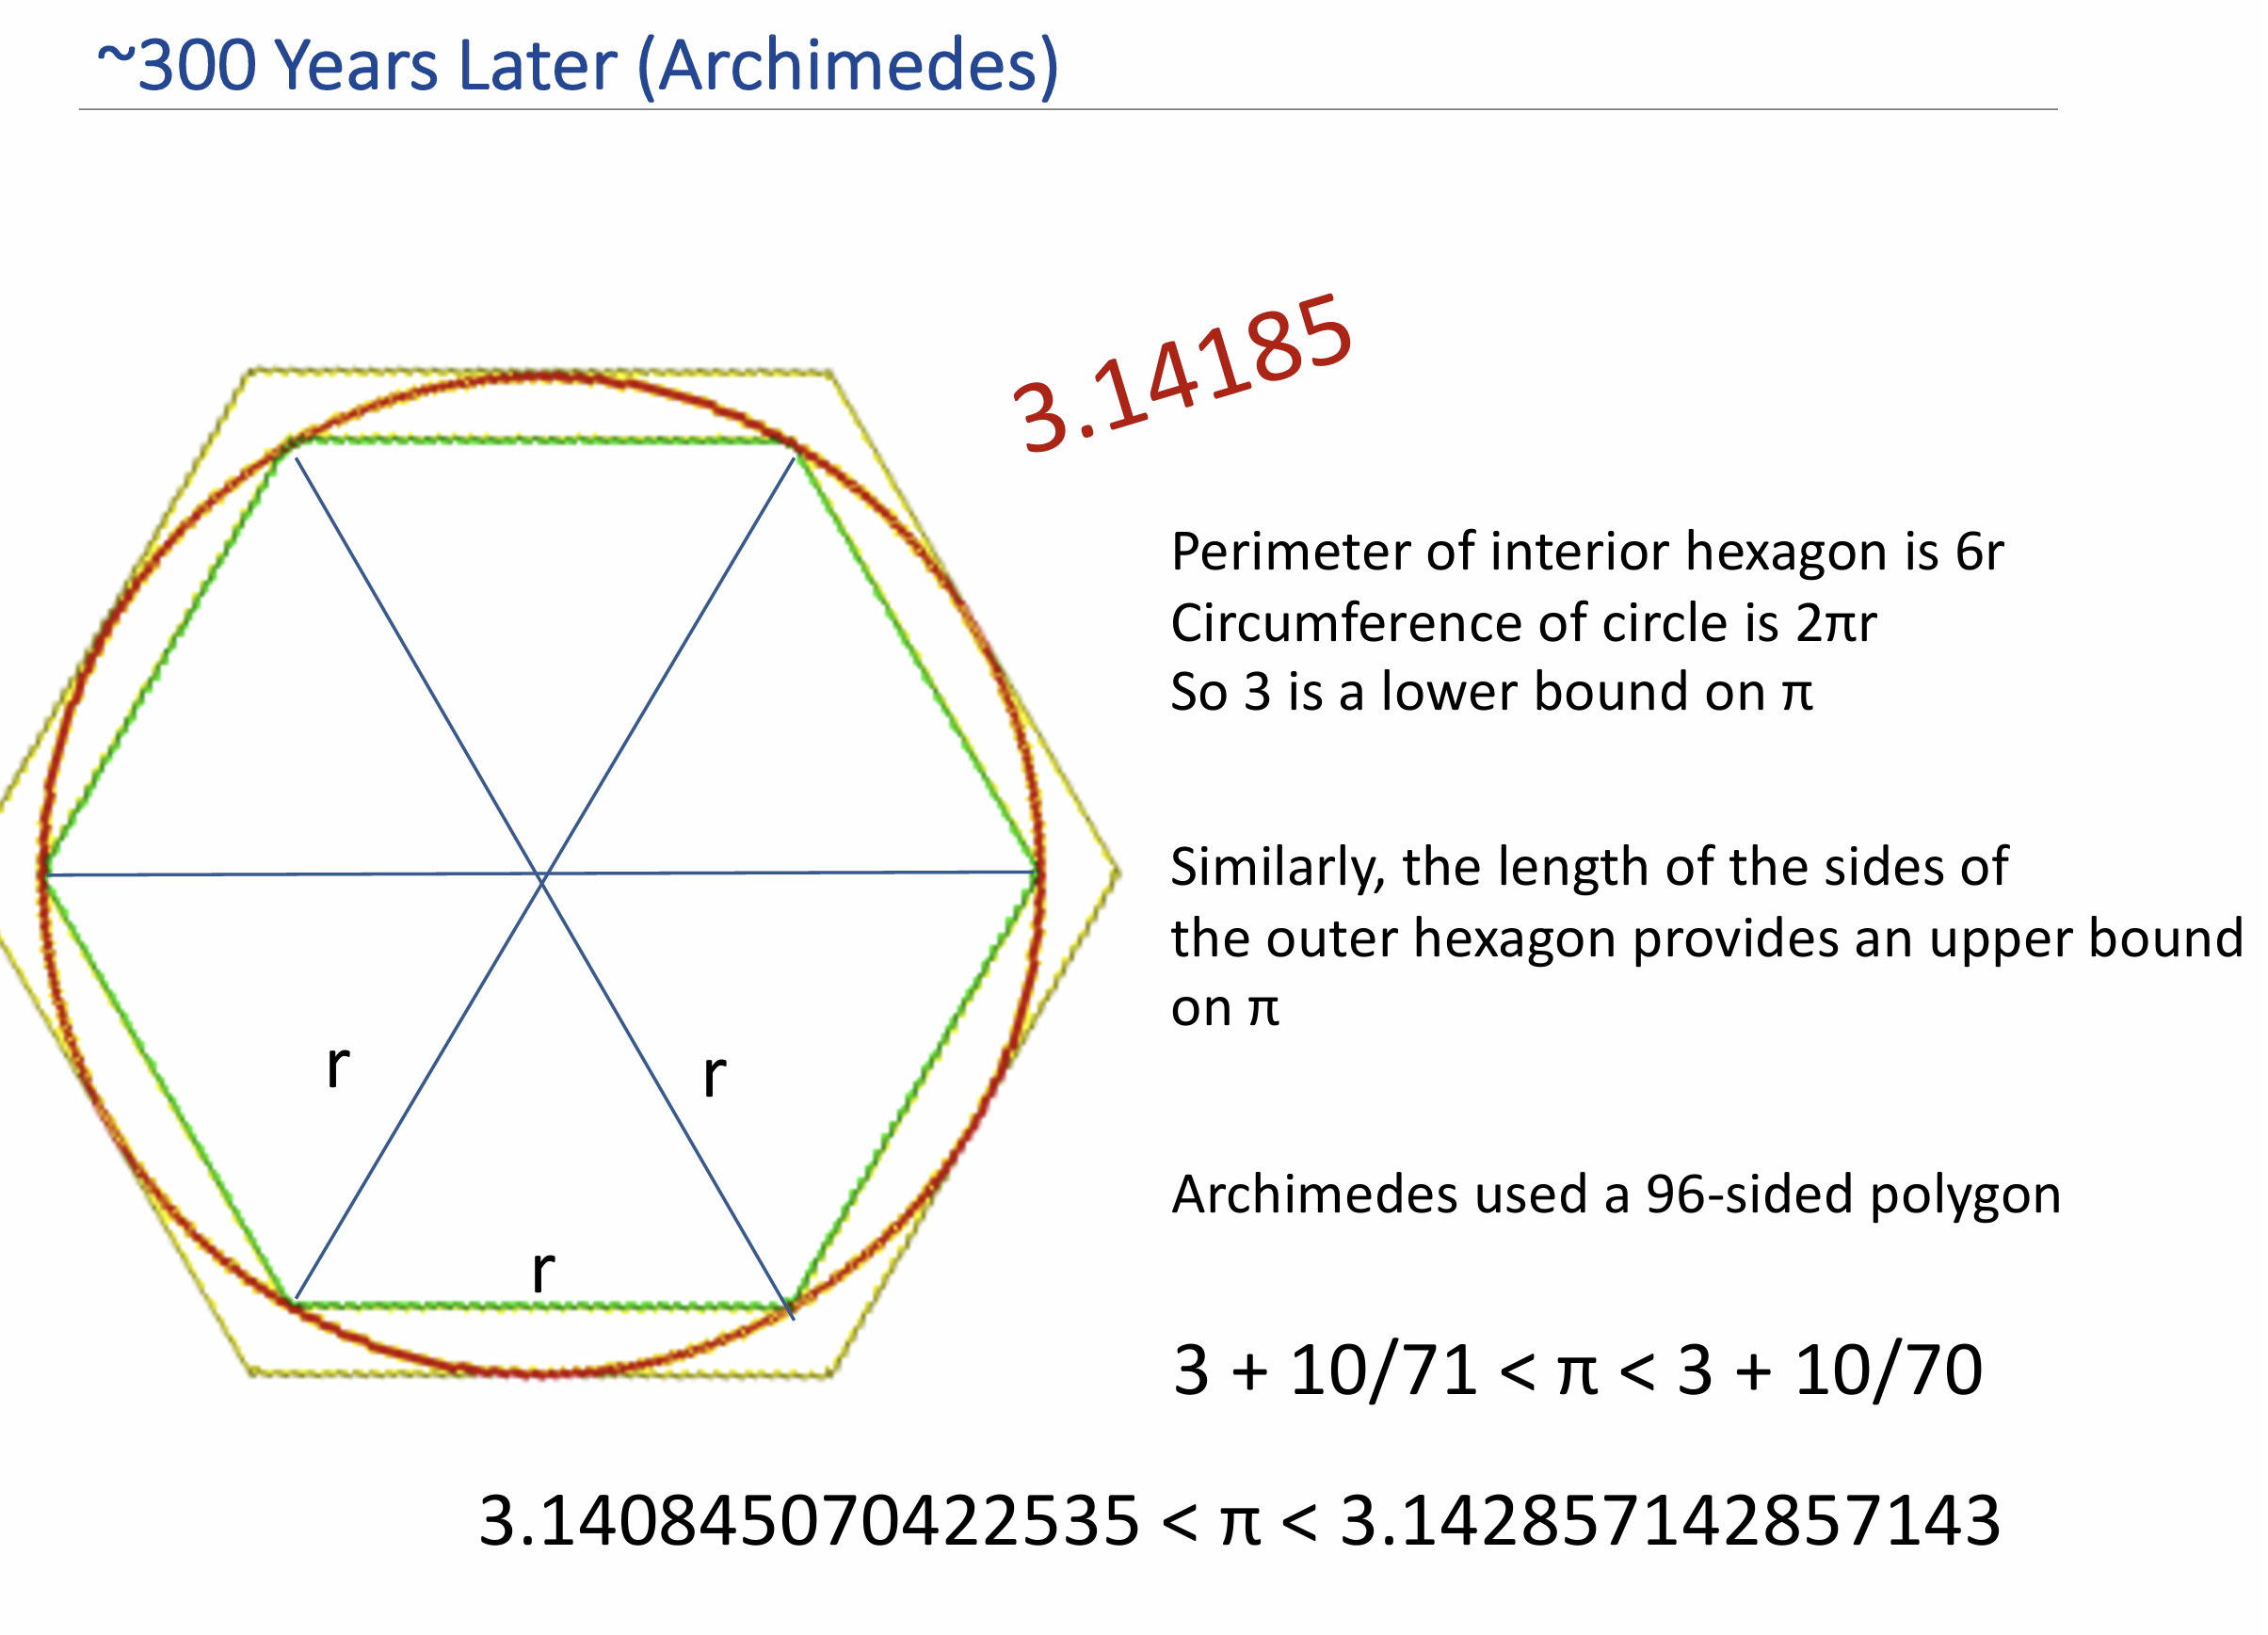

**Buffon-Laplace Method**
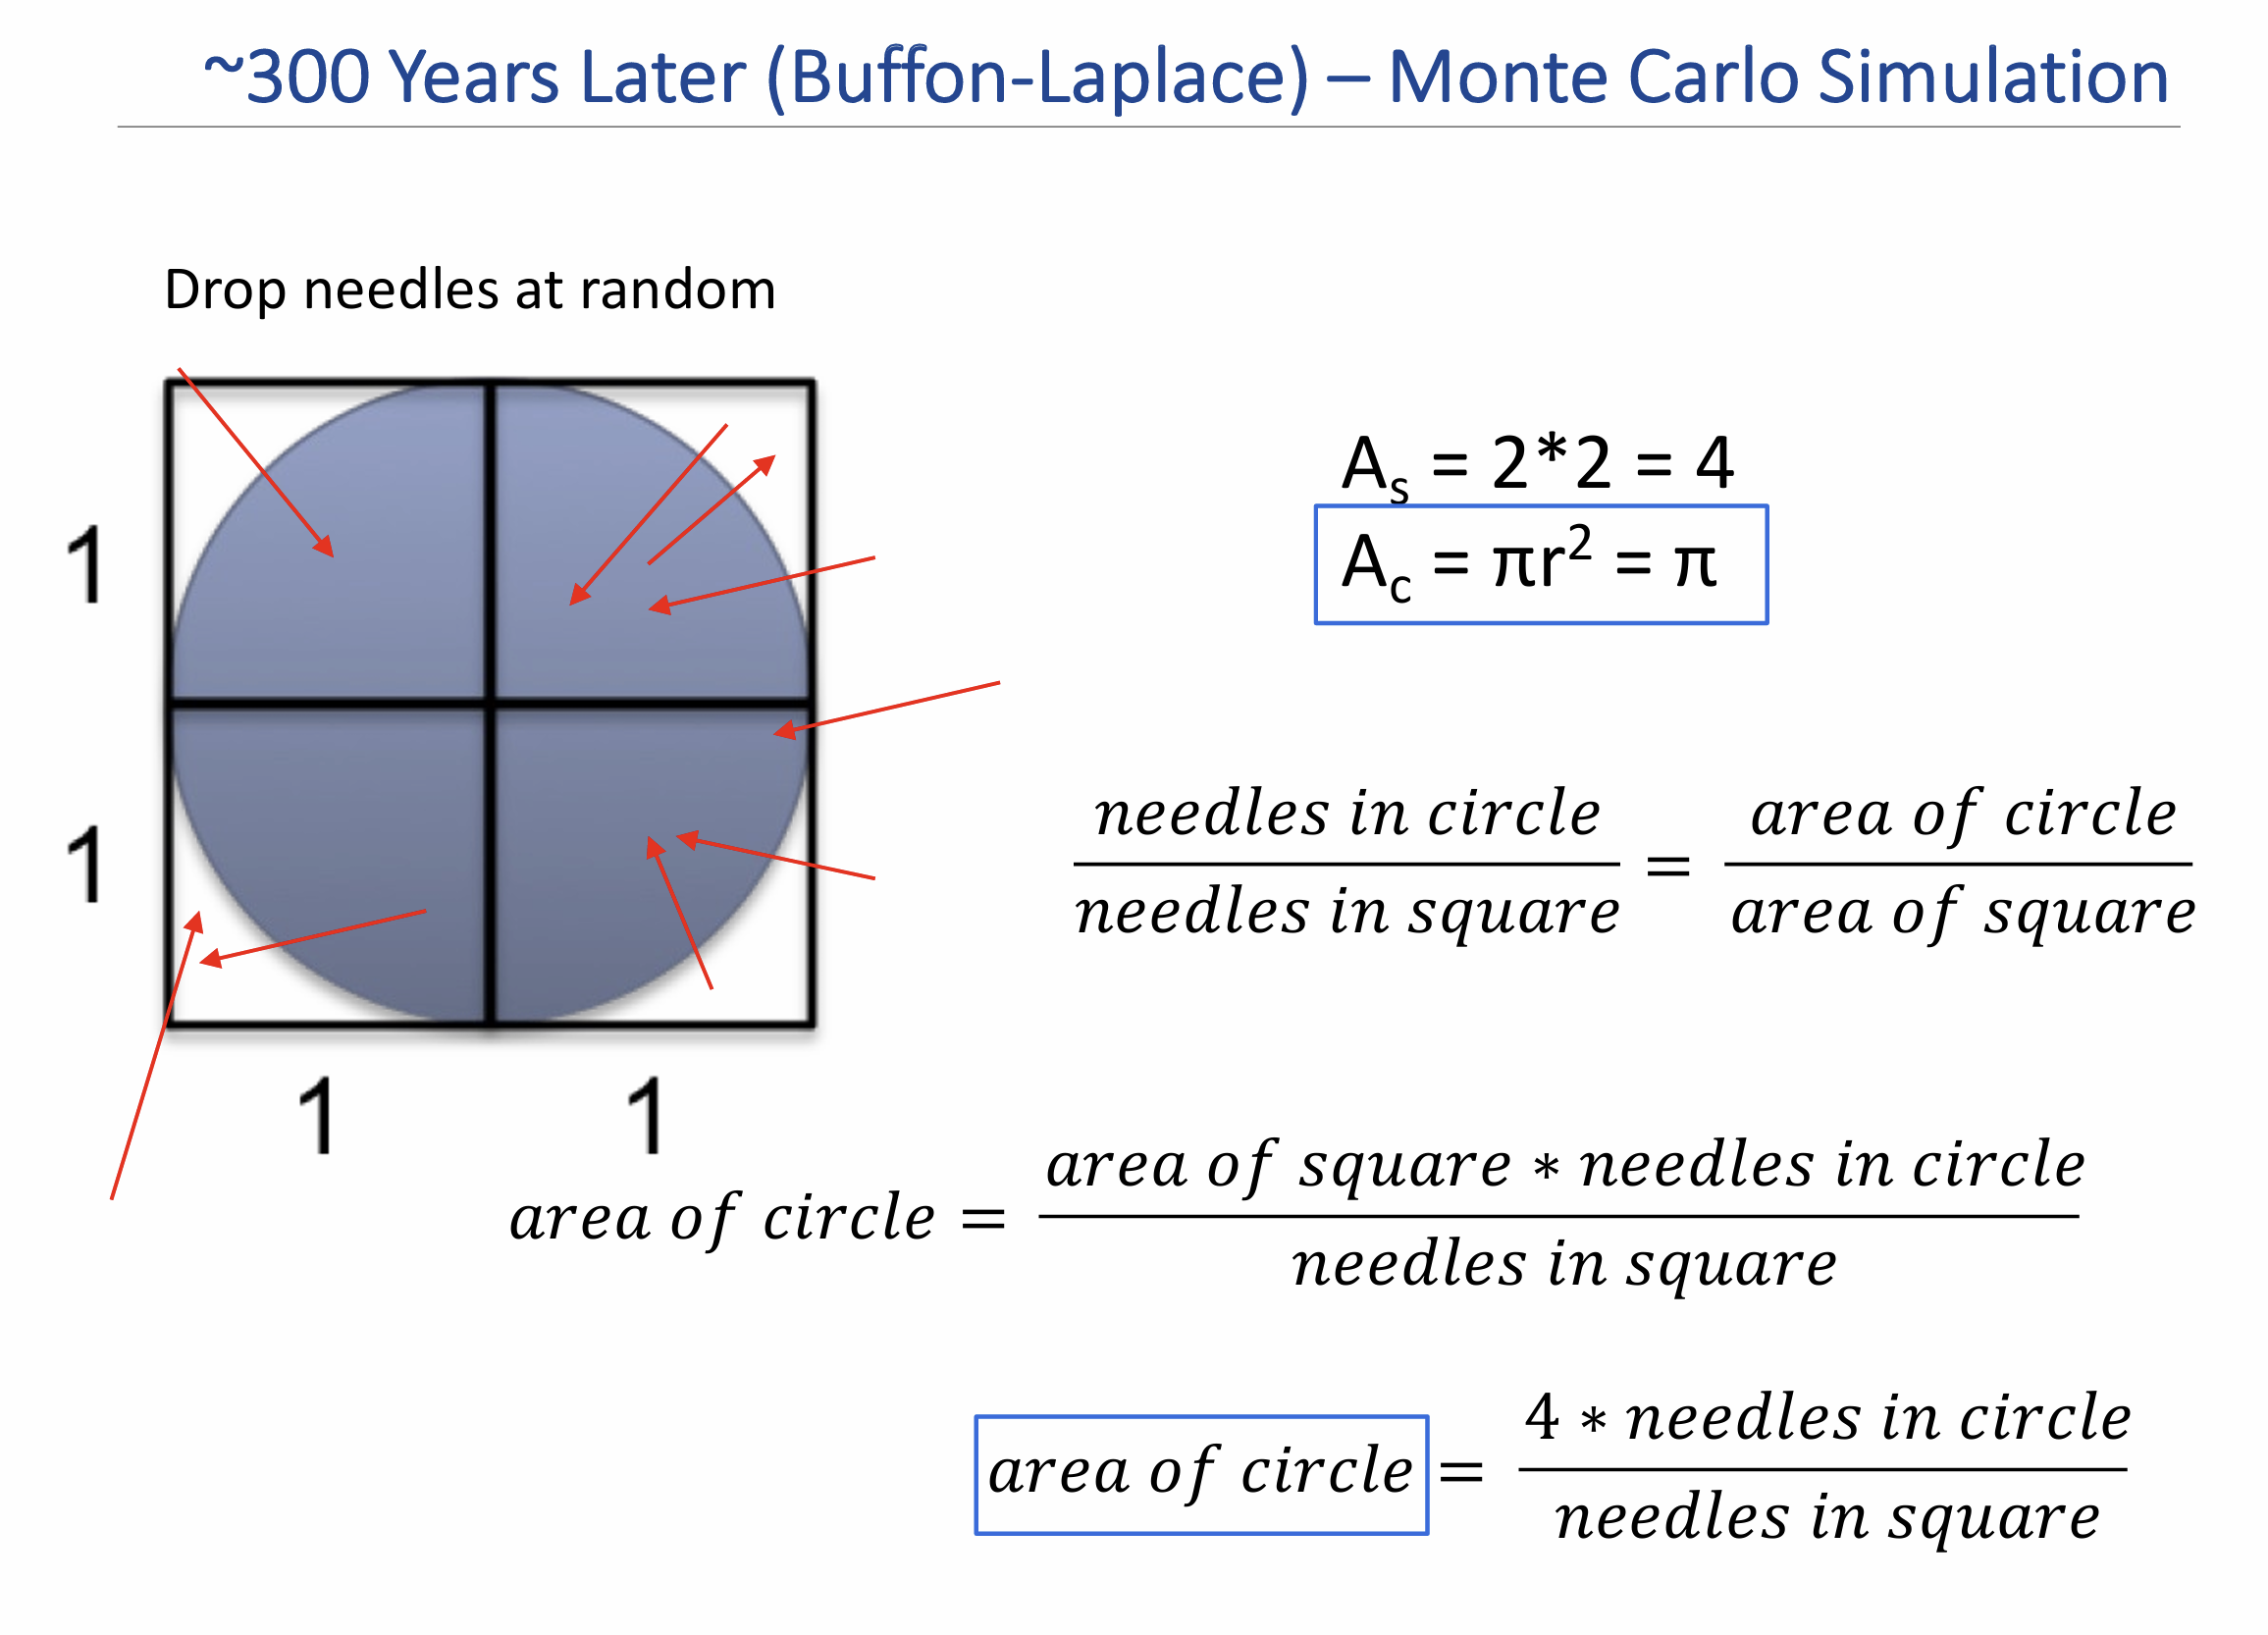

In [ ]:
def throw_needles(num_needles):
    in_circle = 0
    for _ in range(num_needles):
        x = random.random()
        y = random.random()

        if (x*x + y*y)**0.5 <= 1:
            in_circle += 1

    return 4 * in_circle / num_needles


def get_estimate(num_needles, num_trials):
    estimates = [throw_needles(num_needles)
                 for _ in range(num_trials)]
    std_dev = np.std(estimates)
    return (estimates[0], std_dev)

random.seed(0)

for p in range(1, 5):
    n = 10**p
    est, dev = get_estimate(n, 100)
    print(f"Trial with {n:,} needles: est = {est:.5f}, dev = {dev:.5f}")

Trial with 10 needles: est = 2.40000, dev = 0.51031
Trial with 100 needles: est = 2.96000, dev = 0.16925
Trial with 1,000 needles: est = 3.09600, dev = 0.05096
Trial with 10,000 needles: est = 3.14240, dev = 0.01582


Needles = 100, estimate = 3.04, std dev = 0.16987
Needles = 200, estimate = 3.26, std dev = 0.11316
Needles = 400, estimate = 3.19, std dev = 0.078
Needles = 800, estimate = 3.165, std dev = 0.057957
Needles = 1,600, estimate = 3.15, std dev = 0.038909
Needles = 3,200, estimate = 3.1525, std dev = 0.029982
Needles = 6,400, estimate = 3.14, std dev = 0.018514
Needles = 12,800, estimate = 3.1503, std dev = 0.015111
Needles = 25,600, estimate = 3.1472, std dev = 0.01031
Needles = 51,200, estimate = 3.1439, std dev = 0.0070434
Needles = 102,400, estimate = 3.1404, std dev = 0.0050066
Needles = 100, estimate = 3.04, std dev = 0.16987
Needles = 200, estimate = 3.26, std dev = 0.11316
Needles = 400, estimate = 3.19, std dev = 0.078
Needles = 800, estimate = 3.165, std dev = 0.057957
Needles = 1,600, estimate = 3.15, std dev = 0.038909
Needles = 3,200, estimate = 3.1525, std dev = 0.029982
Needles = 6,400, estimate = 3.14, std dev = 0.018514
Needles = 12,800, estimate = 3.1503, std dev = 0.015

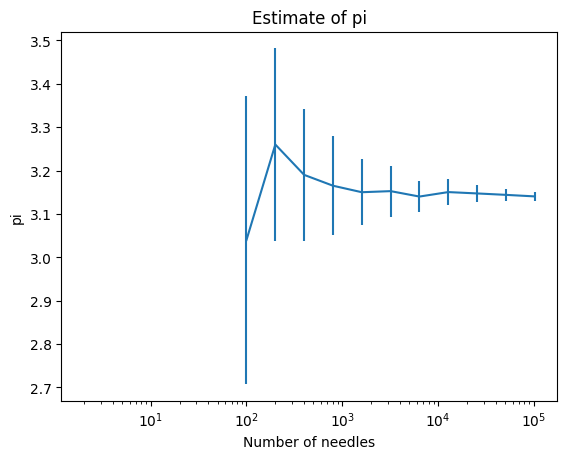

In [8]:
def estimate_pi_CI(precision, num_trials):
    num_needles = 100
    std_dev = precision
    while 1.96 * std_dev >= precision:
        cur_est, std_dev = get_estimate(num_needles, num_trials)
        print(f"Needles = {num_needles:,}, "
              f"estimate = {cur_est:.5g}, std dev = {std_dev:.5g}")
        num_needles *= 2
    return cur_est

def estimate_pi_CI_plot(precision, num_trials):
    num_needles = 100
    std_dev = precision
    needles = []
    estimates = []
    error_bars = []
    while 1.96 * std_dev >= precision:
        cur_est, std_dev = get_estimate(num_needles, num_trials)
        print(f"Needles = {num_needles:,}, "
              f"estimate = {cur_est:.5g}, std dev = {std_dev:.5g}")
        needles.append(num_needles)
        estimates.append(cur_est)
        error_bars.append(1.96 * std_dev)
        num_needles *= 2
    plt.semilogx()
    plt.title("Estimate of pi")
    plt.xlabel("Number of needles")
    plt.ylabel("pi")
    plt.errorbar(needles, estimates, yerr=error_bars)


random.seed(0)
estimate_pi_CI(0.01, 100)

random.seed(0)
estimate_pi_CI_plot(0.01, 100)
plt.show()

We can't say: With high probability the value of pi is 3.14156 +/- 0.0021 * 1.96

We can say: 95% of the time we run this simulation, we will estimate that the value of pi lies within 3.14156 +/- 0.0021 * 1.96

Both are factually correct but only one can be inferred from our simulation

**Statistically valid != True**


### Generally Useful Technique
***When estimating area of some region R***
1. Pick an enclosing region E such that the area of E is easy to calculate and R lies completely within E
2. Pick a set of random points that lie within E
3. Let F be the fraction of the points that fall within R
4. Multiply the area of E by F

In [9]:
def integrate(fcn, minX, maxX, num_samples = 1_000_000):
    under_curve = 0
    for _ in range(num_samples):
        x = random.uniform(minX, maxX)
        y = fcn(x)
        under_curve += y
    return under_curve / num_samples * (maxX - minX)


def integrate_and_print(fcn, minX, maxX, num_samples = 1_000_000):
    result = integrate(fcn, minX, maxX, num_samples)
    print(f'Integral of {fcn.__name__} from {minX:.0f} to {maxX:2f} =',
          f'{result:2f}')

random.seed(0)

integrate_and_print(np.sin, 0, np.pi)
integrate_and_print(np.sin, 0, 2*np.pi)
integrate_and_print(np.cos, 0, np.pi)


Integral of sin from 0 to 3.141593 = 1.999850
Integral of sin from 0 to 6.283185 = -0.003081
Integral of cos from 0 to 3.141593 = -0.001723


In [10]:

f = lambda x: (np.sin(x) * np.cos(x))/np.tan(x)
print(f'{integrate(f, 0, 4):.5f}')

import scipy.integrate
print(f'{scipy.integrate.quad(f, 0,4)[0]:.5f}')

# Compare to provided integration function


sample_result = integrate(np.sin, 0, np.pi, 1_000_000)
scipy_result = scipy.integrate.quad(np.sin, 0, np.pi)[0]
print('Try sin between 0 and pi')
print(f'Abs. difference for sin is {abs(sample_result - scipy_result):.5f}')

sample_result = integrate(np.cos, 0, np.pi, 1_000_000)
scipy_result = scipy.integrate.quad(np.cos, 0, np.pi)[0]
print('Try sin between 0 and 2pi')
print(f'Abs. difference is {abs(sample_result - scipy_result):.5f}')

sample_result = integrate(np.sin, 0, np.pi, 1_000_000)
scipy_result = scipy.integrate.quad(np.sin, 0, np.pi)[0]
print('Try cos between 0 and pi')
print(f'Abs. difference is {abs(sample_result - scipy_result):.5f}')

print(integrate(np.sin, 0, np.pi, 1_000_000)
      - scipy.integrate.quad(np.sin, 0, np.pi)[0])
print(integrate(np.sin, 0, 2*np.pi, 1_000_000)
      - scipy.integrate.quad(np.sin, 0, 2*np.pi)[0])
print(integrate(np.cos, 0, np.pi, 1_000_000)
      - scipy.integrate.quad(np.cos, 0, np.pi)[0])


2.24899
2.24734
Try sin between 0 and pi
Abs. difference for sin is 0.00111
Try sin between 0 and 2pi
Abs. difference is 0.00061
Try cos between 0 and pi
Abs. difference is 0.00036
0.00021740083812726851
0.0005869323002467871
0.0023466218681033315


### Summary
1. Monte Carlo simulation is a technique for estimating parameters of a model by simulating or sampling a subset of a population
2. Need ways to determine confidence in estimates
- Depends of size and variance of samples
3. Throwing darts is one example of a random sampling method
4. In general, random sampling is an important algorithmic tool